## welcome to ImageJam-Desktop experiments notebook!
* picture yourself in a boat on a river, with tangerine trees and marmalade skies
* or picture yourself in an image array on a computer, with binary trees and multithreaded skies

In [7]:
# install dependencies
!pip3 install -r requirements.txt

  Using cached PySimpleGUI-4.60.4-py3-none-any.whl (509 kB)
  Using cached Pillow-9.4.0-2-cp311-cp311-macosx_10_10_x86_64.whl (3.3 MB)


In [9]:
from PIL import Image
import numpy as np

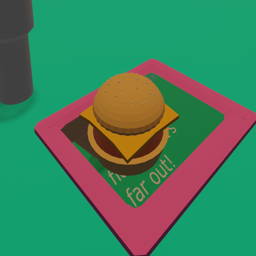

In [5]:
# let's get cooking by loading an image to work with
fp = 'test_img.png'
img = Image.open(fp)
# set the image size to 256x256
img = img.resize((256, 256))
# display the image
img

In [11]:
# converting to array
img_array = np.asarray(img)
# display the array
img_array

array([[[ 64,  64,  64, 255],
        [ 64,  64,  64, 255],
        [ 64,  64,  64, 255],
        ...,
        [ 27, 160, 112, 255],
        [ 27, 160, 112, 255],
        [ 27, 160, 112, 255]],

       [[ 64,  64,  64, 255],
        [ 64,  64,  64, 255],
        [ 64,  64,  64, 255],
        ...,
        [ 27, 160, 112, 255],
        [ 27, 160, 112, 255],
        [ 27, 160, 112, 255]],

       [[ 64,  64,  64, 255],
        [ 64,  64,  64, 255],
        [ 64,  64,  64, 255],
        ...,
        [ 27, 160, 112, 255],
        [ 27, 160, 112, 255],
        [ 27, 160, 112, 255]],

       ...,

       [[ 19, 159, 110, 255],
        [ 19, 159, 110, 255],
        [ 19, 159, 110, 255],
        ...,
        [ 19, 159, 110, 255],
        [ 19, 159, 109, 255],
        [ 19, 159, 110, 255]],

       [[ 19, 159, 110, 255],
        [ 19, 159, 110, 255],
        [ 19, 159, 110, 255],
        ...,
        [ 19, 159, 110, 255],
        [ 19, 159, 110, 255],
        [ 19, 159, 110, 255]],

       [[ 19

## plotting the array in matplotlib

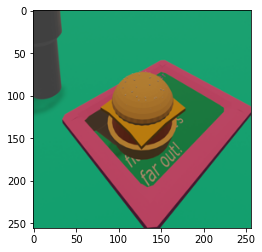

In [12]:
from matplotlib import pyplot as plt
# create the plot
plt.imshow(img_array)

## mirrored images

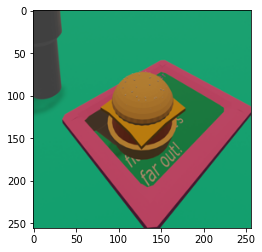

In [16]:
# transpose the array to mirror the image
mir_img_array = np.transpose(img_array, (1, 0, 2))  # (1, 0, 2) is the transpose order, (0, 1, 2) is the original order
plt.imshow(mir_img_array)

## symmetry mirror

In [28]:
img_w, img_h = img.size
half_w = img_w // 2
half_h = img_h // 2

# get half of the image then set the other half to the mirror (transpose) of the first half
# x = width, y = height z = color
half_img_array = img_array[:, :half_w, :]
mir_half_img_array = np.transpose(half_img_array, (1, 0, 2))
# set the second half of the image to the mirror of the first half
img_array[:, 128:, :].shape == mir_half_img_array.shape
# img_array[:, 128:, :] = mir_half_img_array
# display the image
# plt.imshow(mir_half_img_array)

False

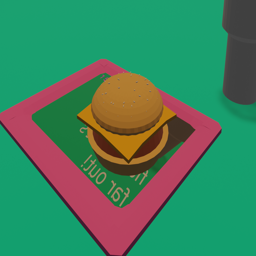

In [8]:
# converting to array
img_array = np.asarray(img)

NameError: name 'np' is not defined